In [2]:
import csv
import cv2
import os
import numpy as np
#import keras

os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf

import random

/home/brian/Programs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [5]:
#input_path = '/home/brian/Documents/Training/Udacity/Self_Driving_Car/beta_simulator_linux/beta_simulator_Data/'
input_path = '/home/brian/Documents/Training/Udacity/Self_Driving_Car/data/data/data/'
#input_path = '/home/workspace/CarND-Behavioral-Cloning-P3/data'
#input_path = '/home/ec2-user/SageMaker/data'
image_path = input_path + 'IMG/'

lines = []
with open(os.path.join(input_path, 'driving_log.csv')) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

lines = np.delete(lines, (0), axis=0)
line_array = np.array(lines)

#calculate moving average
data = line_array[:,3]
data = data.astype(float)

numparts = 5
w = np.arange(1., numparts+1.)
w = w/np.sum(w)

test = np.array([0.0,0.0])
ma = np.convolve(data,w[::-1],'valid')

ma_1 = np.concatenate((test, ma), axis = 0)
ma_2 = np.concatenate((ma_1, test), axis = 0)
ma_2 = ma_2.reshape(len(ma_2), 1)

all_data = np.hstack((line_array, ma_2))

print(min(data))
print(max(data))

print(min(ma_2))
print(max(ma_2))

-0.9426954
1.0
[-0.75226486]
[0.52423897]


(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        1.100e+01, 1.200e+01, 2.100e+01, 3.800e+01, 6.400e+01, 9.200e+01,
        1.190e+02, 1.690e+02, 3.100e+02, 3.900e+02, 6.370e+02, 3.664e+03,
        7.570e+02, 5.370e+02, 4.350e+02, 3.880e+02, 1.440e+02, 9.300e+01,
        5.700e+01, 4.300e+01, 2.500e+01, 1.400e+01, 5.000e+00, 2.000e+00]),
 array([-0.75226486, -0.70971473, -0.6671646 , -0.62461448, -0.58206435,
        -0.53951422, -0.49696409, -0.45441397, -0.41186384, -0.36931371,
        -0.32676358, -0.28421346, -0.24166333, -0.1991132 , -0.15656307,
        -0.11401295, -0.07146282, -0.02891269,  0.01363744,  0.05618756,
         0.09873769,  0.14128782,  0.18383795,  0.22638807,  0.2689382 ,
         0.31148833,  0.35403846,  0.39658858,  0.43913871,  0.48168884,
         0.52423897]),
 <a list of 30 Patch objects>)

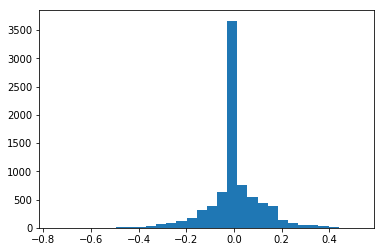

In [6]:
plt.hist(ma_2, bins=30)

In [23]:
images = []
measurements = []
for line in all_data:
    for i in range(3):
        source_path = line[0]
        correction = 0.2
        filename = source_path.split('/')[-1]
        current_path = os.path.join(os.path.join(input_path, 'IMG/', filename))
        original_image = cv2.imread(current_path)
        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        actual_turn = np.round(float(line[3]), decimals=2)
        
        if 'left' in current_path:
            measurement = np.round(float(line[7]), decimals=2) + correction
            actual_turn = np.round(float(line[3]), decimals=2) + correction
        elif 'right' in current_path:
            measurement = np.round(float(line[7]), decimals=2) - correction
            actual_turn = np.round(float(line[3]), decimals=2) - correction
        else :
            measurement = np.round(float(line[7]), decimals=2)
            actual_turn = np.round(float(line[3]), decimals=2)
        
        # Add the image and steering to the array of training data
        images.append(image)
        measurements.append(actual_turn)
        # Flip the image and reverse the steering, then add to the array of training data
        images.append(cv2.flip(image,1))
        measurements.append(measurement*-1.0)


In [10]:
X_train = np.array(images)
y_train = np.array(measurements)

This next bit was an attempt to suppliment the training data. 
However, this was causing errors with the car going off the track.
In reality, removing this section enabled the car to train successfully and drive on the track.

In [6]:
'''
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    random_bright = .25+np.random.uniform() 

    # add brightness
    bright_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    bright_image[:,:,2] = bright_image[:,:,2]*random_bright       

    if round(measurement,2) <= 0.05:
        if random.randint(1,501) <= 50 :
            augmented_images.append(image)
            augmented_measurements.append(measurement)
            augmented_images.append(cv2.flip(image,1))
            augmented_measurements.append(measurement*-1.0)
            augmented_images.append(cv2.flip(bright_image,1))
            augmented_measurements.append(measurement*-1.0)
    else:
        augmented_images.append(bright_image)
        augmented_measurements.append(measurement)
        augmented_images.append(cv2.flip(image,1))
        augmented_measurements.append(measurement*-1.0)
        augmented_images.append(cv2.flip(bright_image,1))
        augmented_measurements.append(measurement*-1.0)

    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)
'''

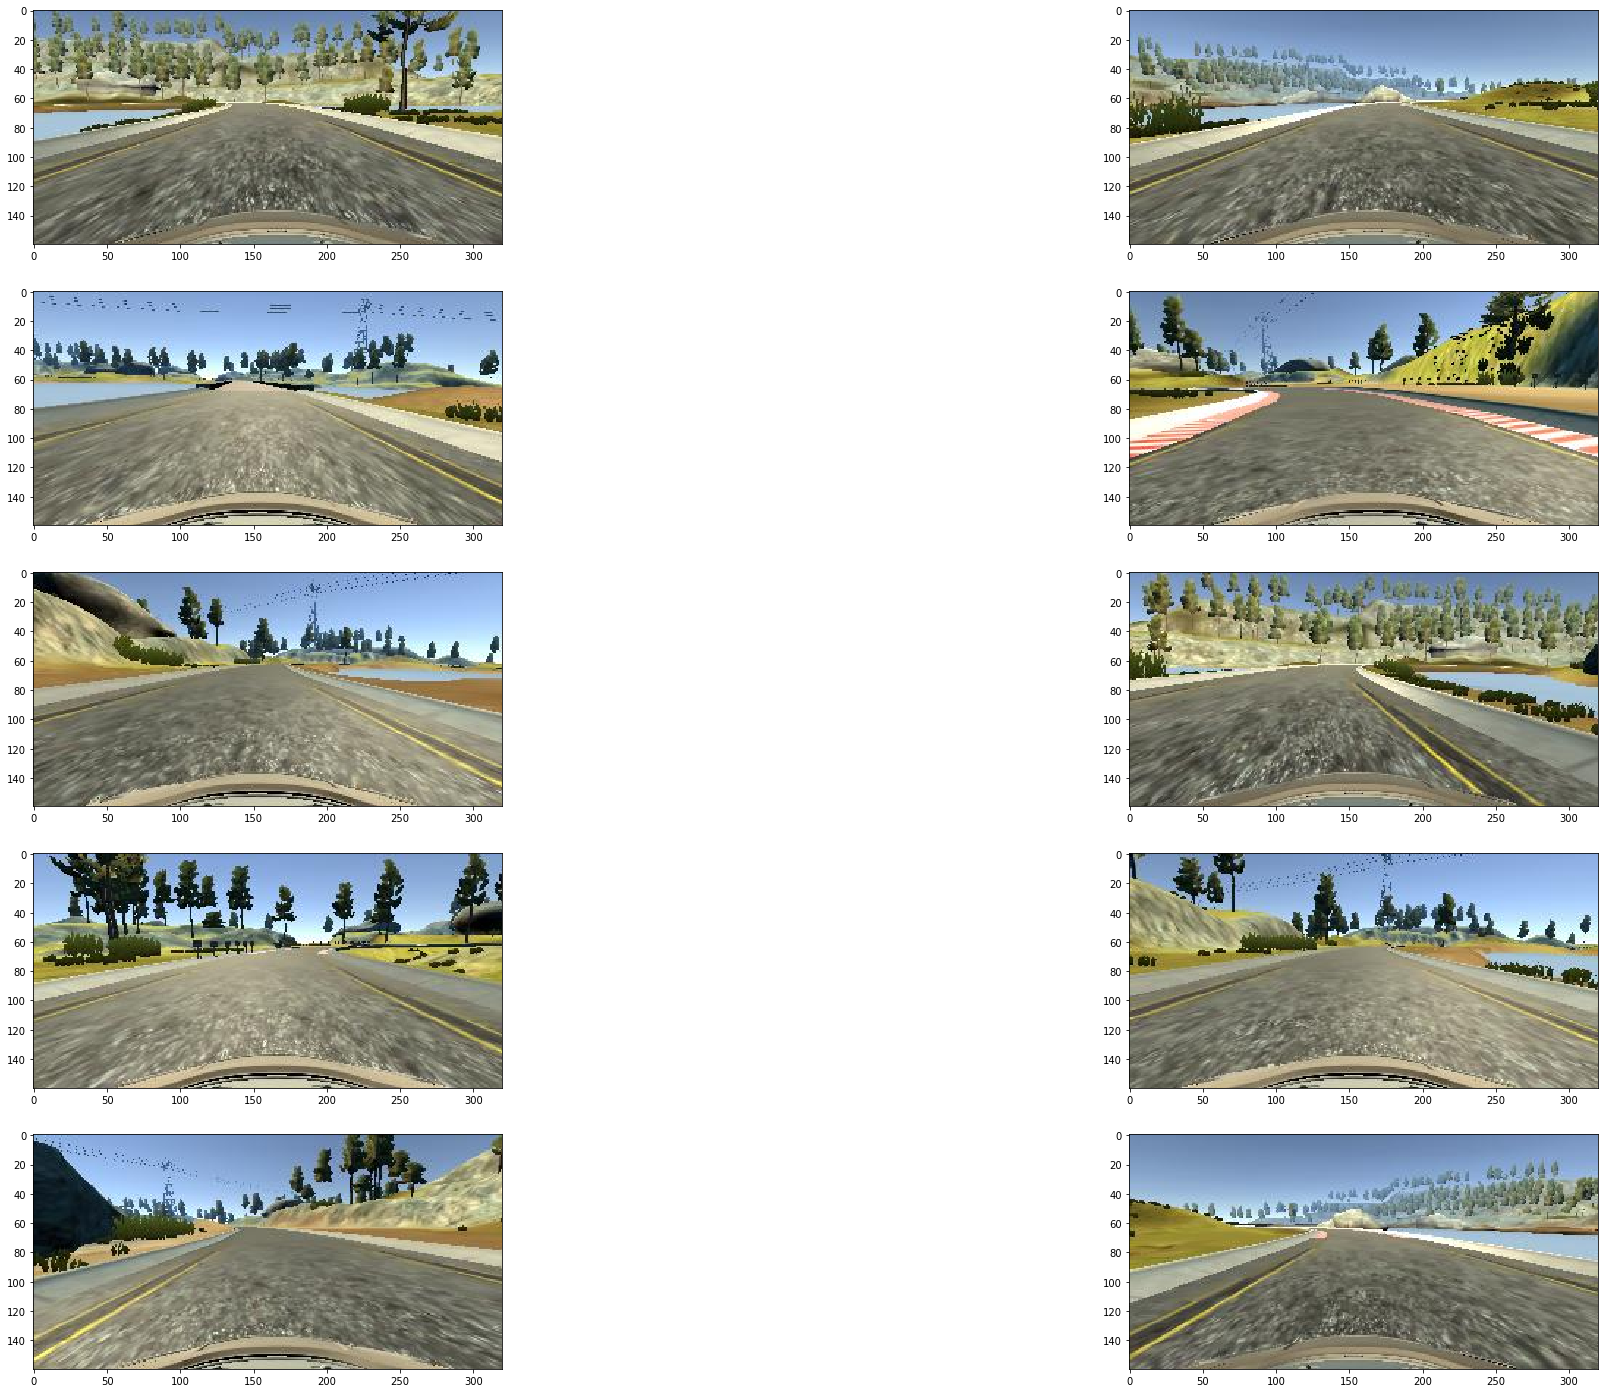

In [22]:
import cv2
plt.rcParams["figure.figsize"] = [36,25]

for i in range(0,10):
    random_num = random.randint(1,len(X_train))    
    plt.subplot(5,2,i+1)#,  figsize=(50,100))
    plt.imshow(X_train[random_num])


(array([1.2000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00, 0.0000e+00,
        1.2000e+01, 4.8000e+01, 1.2000e+02, 1.0200e+02, 1.5600e+02,
        2.4300e+02, 3.9000e+02, 4.3200e+02, 6.8400e+02, 1.0380e+03,
        2.0760e+03, 1.8750e+03, 3.0660e+03, 2.8710e+03, 2.4519e+04,
        2.1510e+03, 2.3490e+03, 1.3830e+03, 2.0460e+03, 6.9000e+02,
        4.3800e+02, 5.8500e+02, 1.9500e+02, 3.3600e+02, 1.1700e+02,
        8.4000e+01, 8.7000e+01, 2.1000e+01, 9.0000e+00, 2.4000e+01,
        1.2000e+01, 6.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([-0.94  , -0.9012, -0.8624, -0.8236, -0.7848, -0.746 , -0.7072,
        -0.6684, -0.6296, -0.5908, -0.552 , -0.5132, -0.4744, -0.4356,
        -0.3968, -0.358 , -0.3192, -0.2804, -0.2416, -0.2028, -0.164 ,
        -0.1252, -0.0864, -0.0476, -0.0088,  0.03  ,  0.0688,  0.1076,
         0.1464,  0.1852,  0.224 ,

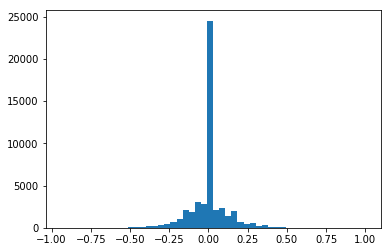

In [14]:
plt.hist(y_train, bins=50)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, MaxPooling2D, Cropping2D
from keras.layers import BatchNormalization
from keras.layers import ELU
from keras.layers import Dropout

#with tf.device("/cpu:0"):
#    model = Sequential()

model = Sequential()
#model = multi_gpu_model(model, gpus=2, cpu_relocation=True)
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3))) #, output_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))

model.add(Conv2D(24,(5,5), activation='relu'))
model.add(ELU())
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(36,(5,5), activation='relu'))
model.add(ELU())
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(48,(5,5), activation='relu'))
model.add(ELU())
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(ELU())
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(ELU())
model.add(Dropout(0.5))

model.add(Flatten())
#model.add(ELU())

#model.add(Dense(512))
#model.add(Dropout(0.4))
#model.add(ELU())

model.add(Dense(100))
#model.add(Dropout(0.4))
model.add(ELU())

model.add(Dense(50))
#model.add(Dropout(0.4))
model.add(ELU())

model.add(Dense(10))
#model.add(Dropout(0.4))
model.add(ELU())

model.add(Dense(1))

Train on 45805 samples, validate on 2411 samples
Epoch 1/5
45805/45805 [==============================] - 705s 15ms/step - loss: 0.6274 - val_loss: 0.0122
Epoch 2/5
45805/45805 [==============================] - 698s 15ms/step - loss: 0.0089 - val_loss: 0.0155
Epoch 3/5
45805/45805 [==============================] - 698s 15ms/step - loss: 0.0079 - val_loss: 0.0107
Epoch 4/5
45805/45805 [==============================] - 697s 15ms/step - loss: 0.0076 - val_loss: 0.0142
Epoch 5/5
45805/45805 [==============================] - 696s 15ms/step - loss: 0.0073 - val_loss: 0.0164
dict_keys(['val_loss', 'loss'])


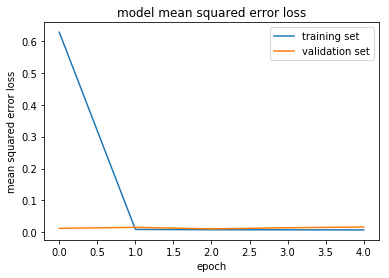

In [16]:
model.compile(loss='mse', optimizer='adam')#, options = run_opts)

history_object = model.fit(x=X_train, y=y_train
                           , batch_size = 64
                           , verbose=1
                           , validation_split=0.05
                           , epochs=5)

#model.fit(X_train, y_train, validation_split=0.4, shuffle=True, epochs=10)

model.save('model_36.h5')

import matplotlib.pyplot as plt

#history_object = model.fit_generator(train_generator, samples_per_epoch =
#    len(train_samples), validation_data = 
#    validation_generator,
#    nb_val_samples = len(validation_samples), 
#    nb_epoch=5, verbose=1)

## print the keys contained in the history object
print(history_object.history.keys())

## plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()